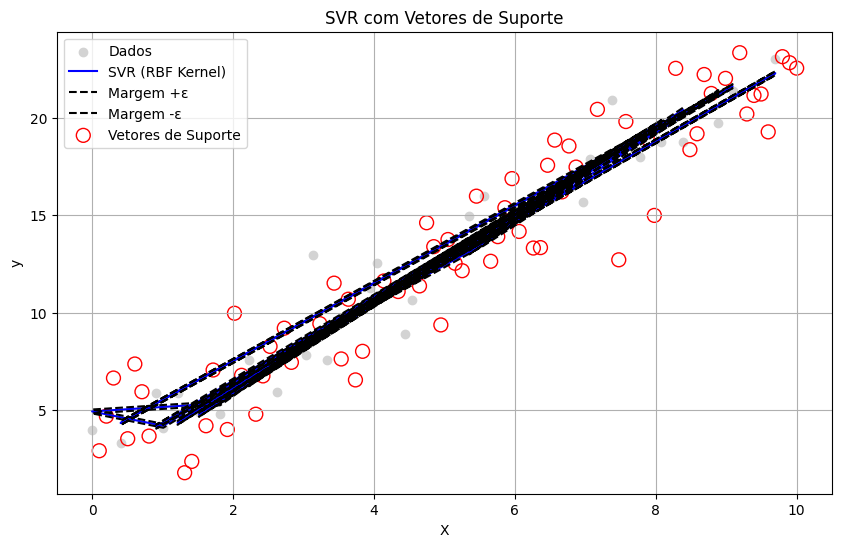

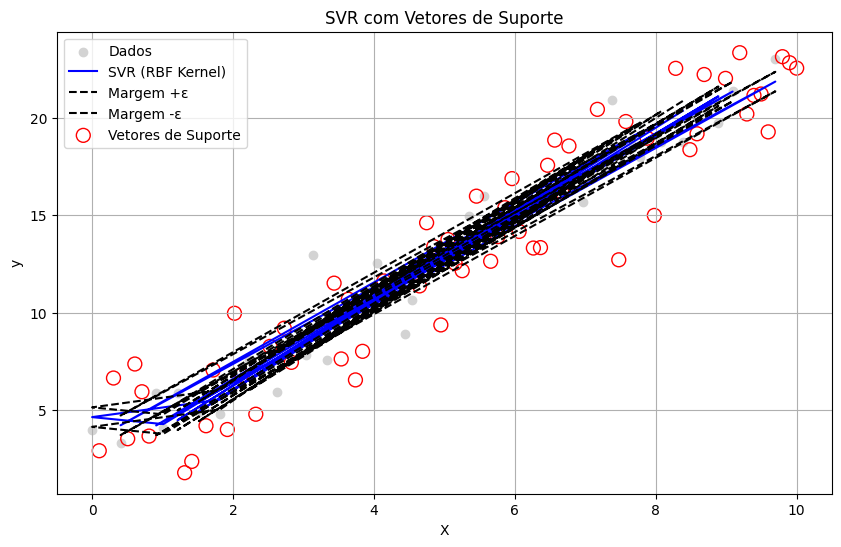

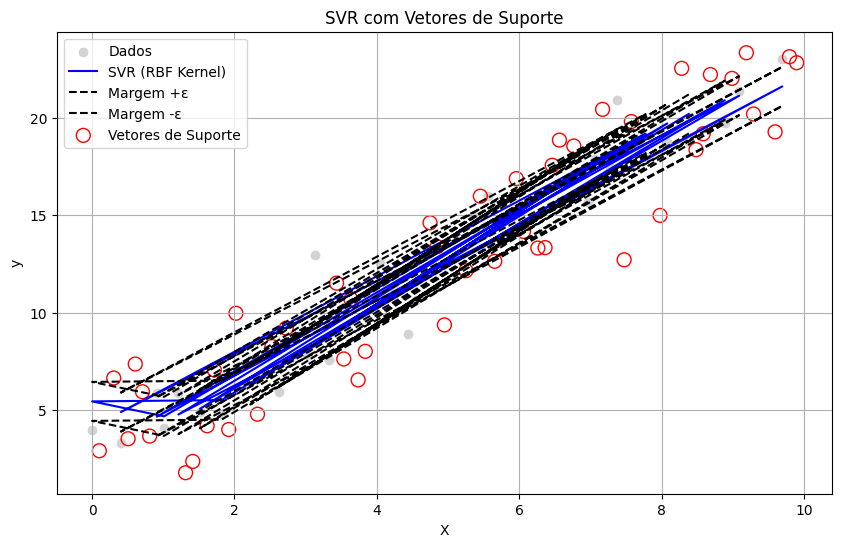

In [43]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.svm import SVR
from sklearn.model_selection import train_test_split
from helpers import synthetic_data


epsilons = (0.1, 0.5, 1.0)
X, y = synthetic_data.generate_linear_data(2.0, 3.0, 100)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

svr = SVR(kernel="rbf", C=10)

for epsilon in epsilons:
    svr.epsilon = epsilon
    svr.fit(X_train, y_train)
    y_pred = svr.predict(X_test)

    plt.figure(figsize=(10, 6))
    plt.scatter(X_test, y_test, color='lightgray', label="Dados")
    plt.plot(X_test, y_pred, color="blue", label="SVR (RBF Kernel)")
    plt.plot(X_test, y_pred + svr.epsilon, "k--", label="Margem +ε")
    plt.plot(X_test, y_pred - svr.epsilon, "k--", label="Margem -ε")

    # Vetores de suporte
    support_X = X_train[svr.support_]
    support_y = y_train[svr.support_]
    plt.scatter(support_X, support_y, facecolors='none', edgecolors='red', s=100, label="Vetores de Suporte")

    plt.xlabel("X")
    plt.ylabel("y")
    plt.title("SVR com Vetores de Suporte")
    plt.legend()
    plt.grid(True)
    plt.show()
